## Importing Necessary Libraries

In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset

In [239]:
df= pd.read_csv("matches.csv")

In [240]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Analysing Dataset

In [241]:
from pandas_profiling import ProfileReport

In [242]:
prof = ProfileReport(df)

In [168]:
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'IPL-2017'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [244]:
df.shape

(756, 18)

### Finding Null Values

In [245]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### Drop Column - Umpire3

In [246]:
df.drop(columns=['umpire3'], inplace = True)

#### Analyzing Columns - Winner, Result

In [249]:
df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [250]:
df[df.winner.isnull()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [251]:
df.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [252]:
df.result.value_counts()

result
normal       743
tie            9
no result      4
Name: count, dtype: int64

#### Dropping all the missing values

In [253]:
df=df.dropna().reset_index(drop=True)

In [254]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

#### Checking the data for duplicate values

In [255]:
df.duplicated().sum()

0

#### Dropping unnecessary columns

In [258]:
df.drop(columns = ['venue','umpire1','umpire2'], inplace = True)

In [259]:
df.shape

(743, 14)

## Data Visualization

### Team Performace Analysis - To see which teams have won the most matches

In [260]:
df.winner.value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

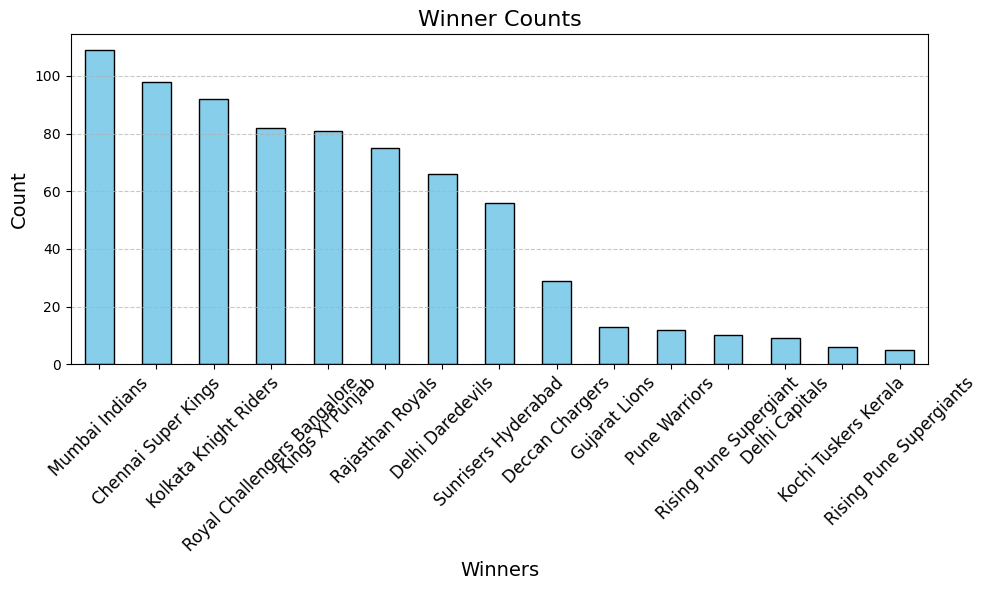

In [261]:
winner_counts = df['winner'].value_counts()
plt.figure(figsize=(10, 6))
winner_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Winner Counts', fontsize=16)
plt.xlabel('Winners', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### "Mumbai Indians" won the most matches

### Toss Winner Analysis

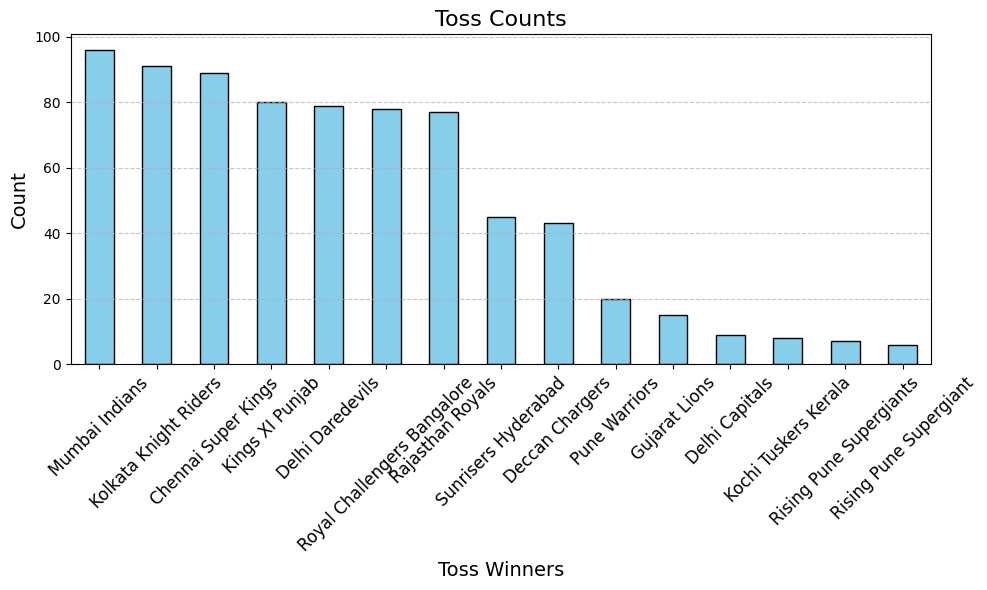

In [262]:
toss_counts = df['toss_winner'].value_counts()
plt.figure(figsize=(10, 6))
toss_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Toss Counts', fontsize=16)
plt.xlabel('Toss Winners', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### "Mumbai Indians" won the most tosses

In [263]:
df['toss_win = win'] = (df['toss_winner'] == df['winner']).astype(int)

In [264]:
df['toss_win = win'].value_counts()

toss_win = win
1    388
0    355
Name: count, dtype: int64

### Toss-Decision Analysis

In [265]:
df['toss_decision'].value_counts()

toss_decision
field    455
bat      288
Name: count, dtype: int64

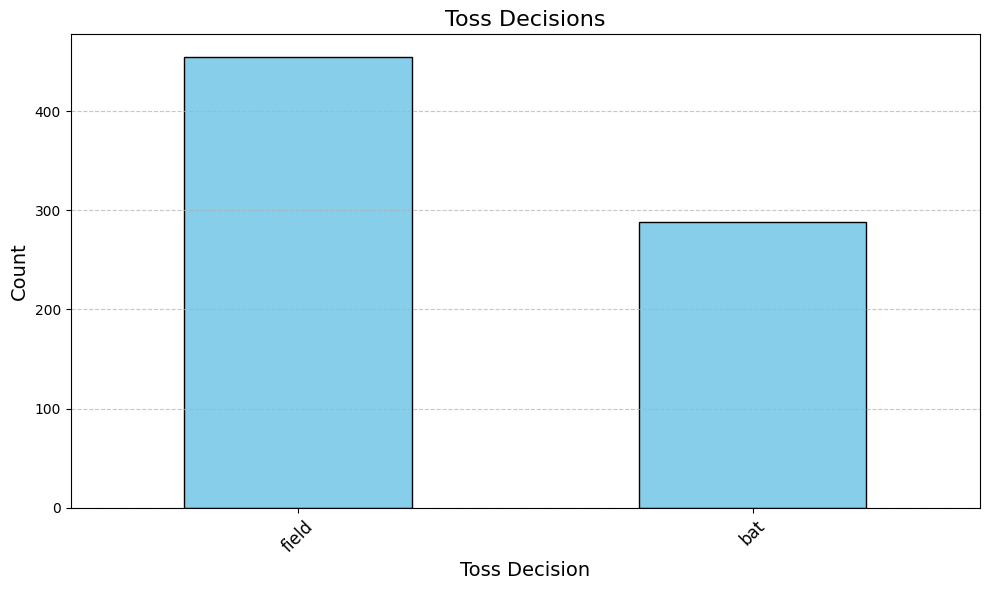

In [266]:
decision_counts = df['toss_decision'].value_counts()
plt.figure(figsize=(10, 6))
decision_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Toss Decisions', fontsize=16)
plt.xlabel('Toss Decision', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### City-Wise distribution of matches

<Axes: title={'center': 'Matches by City'}, xlabel='city'>

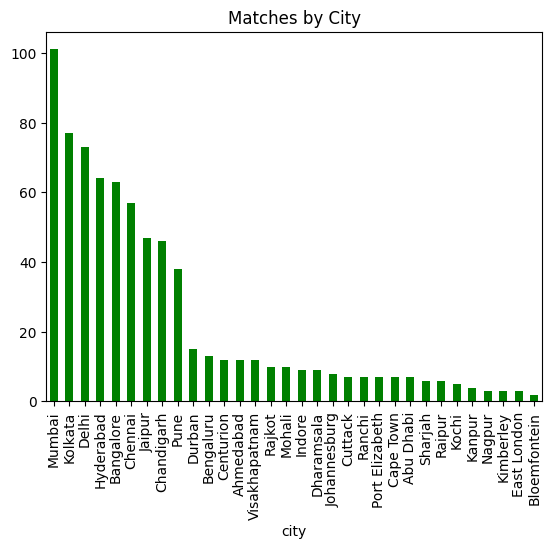

In [267]:
df['city'].value_counts().plot(kind='bar', color='green', title='Matches by City')

### Mumbai has hosted the most matches

### Distribution of Matches by Season

<Axes: title={'center': 'Matches by Season'}, xlabel='Season'>

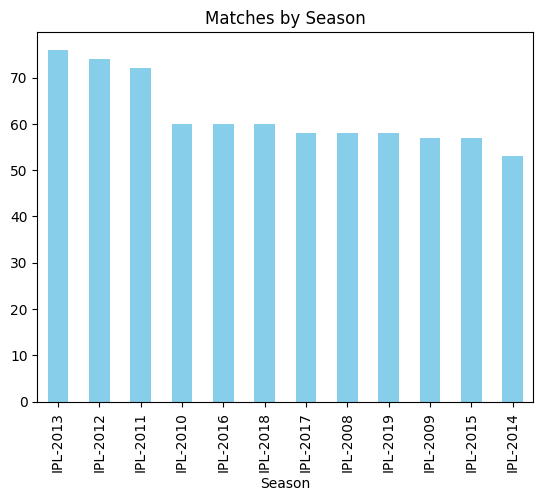

In [268]:
df['Season'].value_counts().plot(kind='bar', color='skyblue', title='Matches by Season')

### IPL-2013 had the most matches

### Win Margin Analysis

In [269]:
df['win_by_runs'].value_counts()

win_by_runs
0      410
14      13
10      11
4       10
1       10
      ... 
76       1
111      1
74       1
42       1
118      1
Name: count, Length: 89, dtype: int64

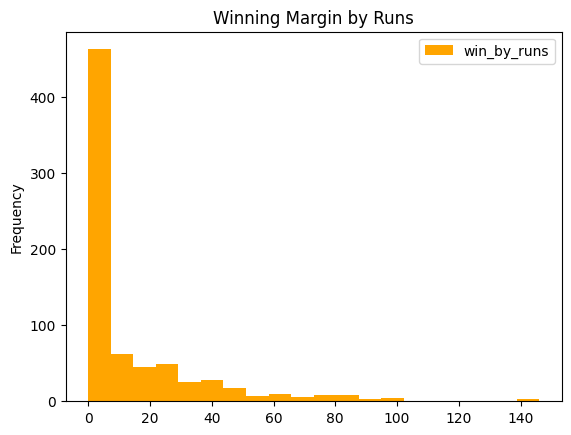

In [270]:
df['win_by_runs'].plot(kind='hist', bins=20, color='orange', title='Winning Margin by Runs')
plt.legend()

In [271]:
df['win_by_wickets'].value_counts()

win_by_wickets
0     342
6      85
7      78
5      70
8      54
4      40
9      37
3      18
10     11
2       5
1       3
Name: count, dtype: int64

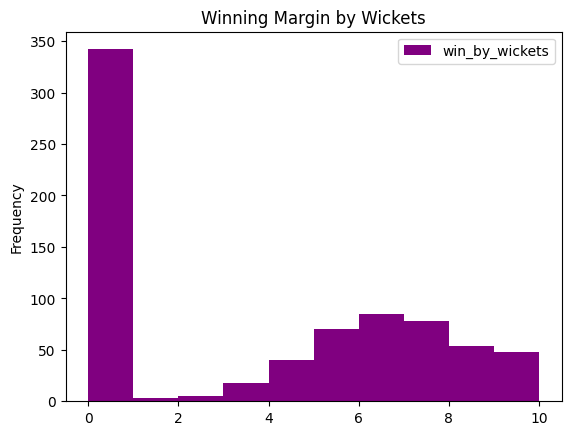

In [272]:
df['win_by_wickets'].plot(kind='hist', bins=10, color='purple', title='Winning Margin by Wickets')
plt.legend()

### Top 10 players of the match

<Axes: title={'center': 'Top Players of the Match'}, xlabel='player_of_match'>

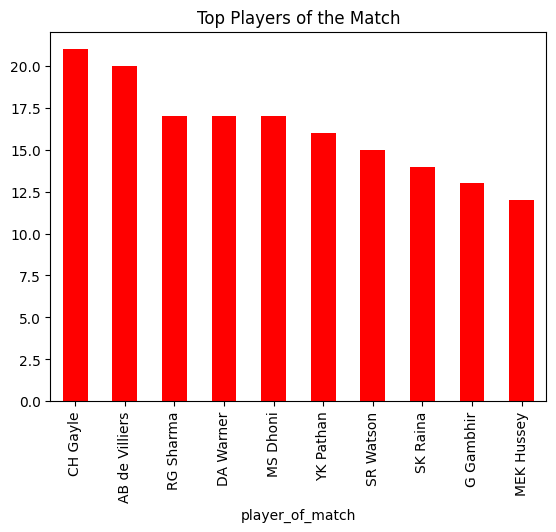

In [273]:
df['player_of_match'].value_counts().head(10).plot(kind='bar', color='red', title='Top Players of the Match')

### Duckworth-Lewis (DL) Applied Matches

<Axes: title={'center': 'DL Method Application'}, ylabel='count'>

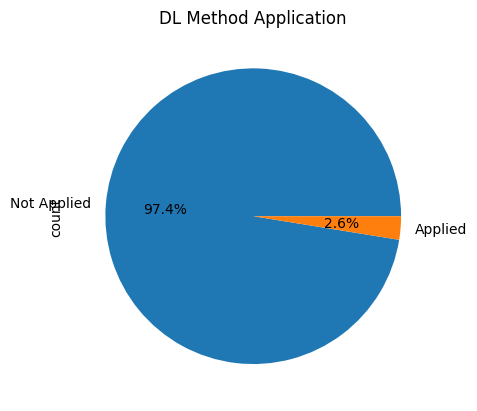

In [274]:
df['dl_applied'].value_counts().plot(kind='pie', labels=['Not Applied', 'Applied'], autopct='%1.1f%%', title='DL Method Application')

### Only 2.6% matches had applied DL

### Season wise Team Performance

<Axes: title={'center': 'Team Performance Across Seasons'}, xlabel='Season'>

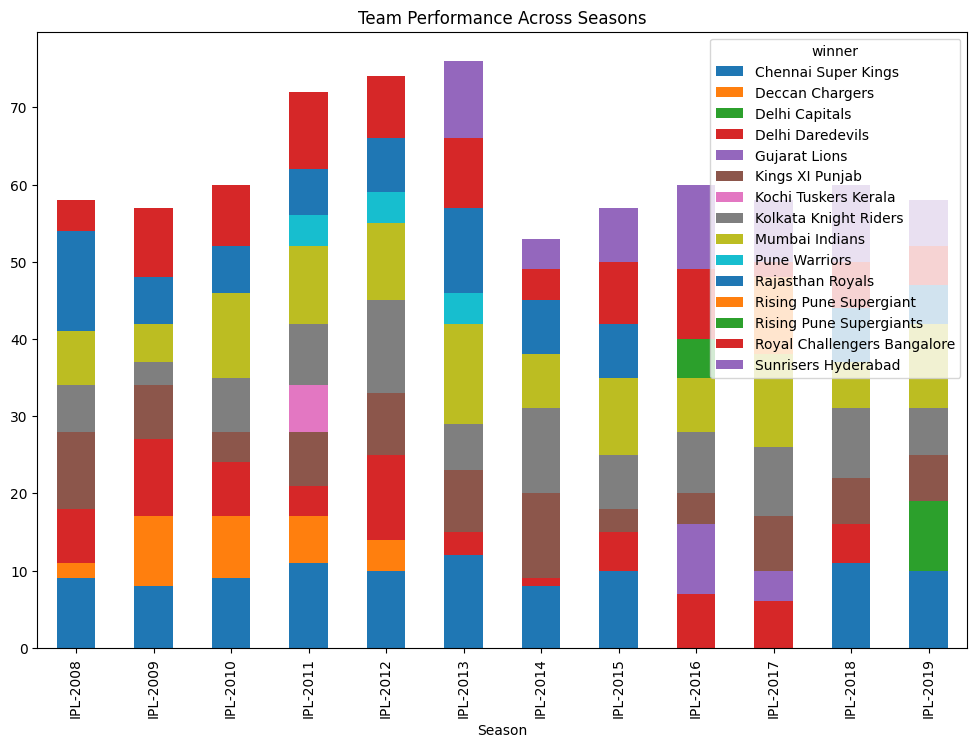

In [275]:
team_season_performance = df.groupby(['Season', 'winner']).size().unstack(fill_value=0)
team_season_performance.plot(kind='bar', stacked=True, figsize=(12, 8), title='Team Performance Across Seasons')

## Match Winner Prediction

In [282]:
df.drop(columns=['id', 'date', 'result', 'win_by_runs','win_by_wickets', 'player_of_match', 'toss_win = win'],axis=1,inplace=True)

In [283]:
df.head()

,Season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner
0,IPL-2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad
1,IPL-2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant
2,IPL-2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,Kolkata Knight Riders
3,IPL-2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,Kings XI Punjab
4,IPL-2017,Hyderabad,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,Sunrisers Hyderabad


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Season         743 non-null    object
 1   city           743 non-null    object
 2   team1          743 non-null    object
 3   team2          743 non-null    object
 4   toss_winner    743 non-null    object
 5   toss_decision  743 non-null    object
 6   dl_applied     743 non-null    int64 
 7   winner         743 non-null    object
dtypes: int64(1), object(7)
memory usage: 46.6+ KB


In [302]:
# Extract the numeric year from the 'Season' column
df['Season'] = df['Season'].str.extract(r'(\d{4})').astype(int)

In [303]:
df.head()

,Season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner
0,2017,64,14,13,13,1,0,14
1,2017,38,8,11,11,1,0,11
2,2017,10,4,7,7,1,0,7
3,2017,9,11,5,5,1,0,5
4,2017,64,4,14,14,1,0,14


In [304]:
# Chnage the dtype of column - Season
df.Season.astype(object)

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
738    2019
739    2019
740    2019
741    2019
742    2019
Name: Season, Length: 743, dtype: object

In [305]:
# Mapping the frequency of the column City to each city
city_freq = df['city'].value_counts().to_dict()
df['city'] = df['city'].map(city_freq)

In [306]:
df.head()

,Season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner
0,2017,64,14,13,13,1,0,14
1,2017,38,8,11,11,1,0,11
2,2017,20,4,7,7,1,0,7
3,2017,18,11,5,5,1,0,5
4,2017,64,4,14,14,1,0,14


In [307]:
df.team1.unique()

array([14,  8,  4, 11,  7, 13,  3,  5,  0, 10,  1,  6,  9, 12,  2])

In [308]:
df.team2.unique()

array([13, 11,  7,  5, 14,  8,  4,  3, 10,  0,  1,  9,  6, 12,  2])

#### Encoding categorical columns

In [294]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
all_teams = pd.concat([df['team1'], df['team2'],df['winner'],df['toss_winner']])
le.fit(all_teams)

# Transform team1 and team2 using the same LabelEncoder
df['team1'] = le.transform(df['team1'])
df['team2'] = le.transform(df['team2'])
df['winner'] = le.transform(df['winner'])
df['toss_winner'] = le.transform(df['toss_winner'])

In [295]:
df.head()

,Season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner
0,IPL-2017,64,14,13,13,field,0,14
1,IPL-2017,38,8,11,11,field,0,11
2,IPL-2017,10,4,7,7,field,0,7
3,IPL-2017,9,11,5,5,field,0,5
4,IPL-2017,64,4,14,14,field,0,14


In [309]:
le1 = LabelEncoder()
le.fit(df['toss_decision'])
df['toss_decision'] = le.transform(df['toss_decision'])

In [310]:
df.head()

,Season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner
0,2017,64,14,13,13,1,0,14
1,2017,38,8,11,11,1,0,11
2,2017,20,4,7,7,1,0,7
3,2017,18,11,5,5,1,0,5
4,2017,64,4,14,14,1,0,14


In [311]:
df.columns

Index(['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'dl_applied', 'winner'],
      dtype='object')

#### Splitting the data in dependent and independent features

In [312]:
X=df[['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'dl_applied']]
y=df['winner']

#### Train Test Split

In [313]:
from sklearn.model_selection import train_test_split

In [314]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Using the Classification Model - DecisionTreeClassifier

In [315]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.44385548127003205, 0.975, 'x[4] <= 0.5\ngini = 0.895\nsamples = 594\nvalue = [79.0, 27.0, 7.0, 54.0, 10.0, 69.0, 4.0, 68.0, 93.0\n10.0, 50.0, 7.0, 4.0, 64.0, 48.0]'),
 Text(0.054587339743589744, 0.925, 'x[1] <= 16.5\ngini = 0.57\nsamples = 75\nvalue = [48, 1, 0, 3, 0, 4, 0, 3, 7, 1, 1, 0, 0, 5\n2]'),
 Text(0.2492214105068109, 0.95, 'True  '),
 Text(0.016025641025641024, 0.875, 'x[1] <= 12.5\ngini = 0.722\nsamples = 6\nvalue = [2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2\n0]'),
 Text(0.009615384615384616, 0.825, 'x[3] <= 2.0\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.00641025641025641, 0.775, 'x[0] <= 2009.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.003205128205128205, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.009615384615384616, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.012

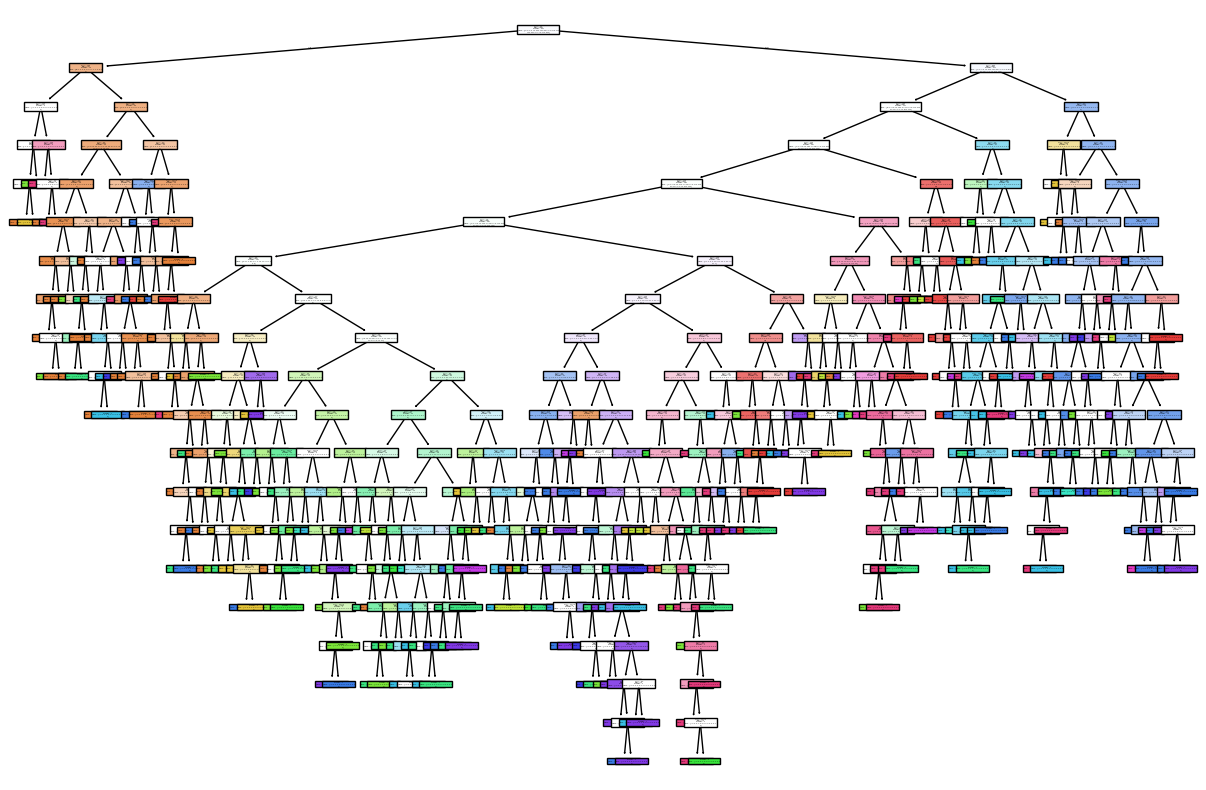

In [316]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [318]:
y_pred=treeclassifier.predict(X_test)

In [319]:
from sklearn.metrics import confusion_matrix,classification_report

In [326]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.25      0.50      0.33         2
           2       1.00      1.00      1.00         2
           3       0.58      0.58      0.58        12
           4       0.50      0.67      0.57         3
           5       0.47      0.58      0.52        12
           6       0.00      0.00      0.00         2
           7       0.83      0.42      0.56        24
           8       0.43      0.62      0.51        16
           9       0.00      0.00      0.00         2
          10       0.63      0.48      0.55        25
          11       1.00      0.67      0.80         3
          12       0.00      0.00      0.00         1
          13       0.47      0.44      0.46        18
          14       0.50      0.88      0.64         8

    accuracy                           0.56       149
   macro avg       0.49      0.51      0.48       149
weighted avg       0.59   

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

#### RandomForestClassifier

In [321]:
from sklearn.ensemble import RandomForestClassifier

In [322]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [323]:
y_pred=random_forest.predict(X_test)

In [325]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.25      0.50      0.33         2
           2       1.00      1.00      1.00         2
           3       0.58      0.58      0.58        12
           4       0.50      0.67      0.57         3
           5       0.47      0.58      0.52        12
           6       0.00      0.00      0.00         2
           7       0.83      0.42      0.56        24
           8       0.43      0.62      0.51        16
           9       0.00      0.00      0.00         2
          10       0.63      0.48      0.55        25
          11       1.00      0.67      0.80         3
          12       0.00      0.00      0.00         1
          13       0.47      0.44      0.46        18
          14       0.50      0.88      0.64         8

    accuracy                           0.56       149
   macro avg       0.49      0.51      0.48       149
weighted avg       0.59   

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif